# ✏️ EXERCÍCIOS: Introdução aos principais conceitos de modelos preditivos.

---

## 📋 Índice

1. [Exercício 1: Classificação com Dataset Diabetes](#exercicio1)
2. [Exercício 2: Regressão com Dataset Housing](#exercicio2)

---

## 🎯 Objetivos de Aprendizagem

Ao completares estes exercícios, serás capaz de:

1. **Aplicar** o pipeline de ML em problemas reais
2. **Identificar** features categóricas e numéricas
3. **Implementar** pré-processamento (normalização e one-hot encoding)
4. **Treinar e avaliar** modelos de classificação e regressão
5. **Interpretar** métricas de avaliação e diagnosticar problemas

---

## 📚 Pré-requisitos

Antes de começares, certifica-te de que:
- ✅ Completaste o notebook **Aula 1: Introdução aos principais conceitos de modelos preditivos**
- ✅ Entendes os conceitos de classificação e regressão
- ✅ Sabes utilizar o pandas para manipulares os dados
- ✅ Compreendes o conceito de treino e teste

---

## 💡 Como utilizares este Notebook?

1. **Lê cada exercício completamente** antes de começar
2. **Utiliza as dicas progressivas** se ficares bloqueado (clique para expandir)
3. **Valida as tuas respostas** utilizando as células de verificação
4. **Compara a com as soluções** apenas após tentares resolver o exercício

---

# <a name="exercicio1"></a> 📊 Exercício 1: Classificação com Dataset Diabetes

## Objetivo do Exercício

Aplicar o pipeline completo de classificação utilizando o dataset **Diabetes**, que contém características de pacientes e o objetivo é prever se o paciente tem diabetes (1) ou não (0).

### 🎯 Objetivos Específicos:
- Carregar e explorar dados reais
- Identificar e processar variáveis categóricas e numéricas
- Treinar um modelo KNN
- Avaliar e interpretar resultados

## Passo 0: Configuração Inicial

Execute as células abaixo para configurar o ambiente e carregar as ferramentas necessárias.

In [1]:
# ============================================================================
# FUNÇÃO DE PRÉ-PROCESSAMENTO
# ============================================================================
# Esta função será reutilizada em todos os exercícios
# Ela normaliza variáveis numéricas e aplica one-hot encoding às categóricas

def process_data(X, num_vars, cat_vars):
    """
    Processa dados para machine learning: normaliza numéricas e codifica categóricas.
    
    Parâmetros:
    -----------
    X : DataFrame
        Dataset com variáveis independentes
    num_vars : list
        Lista com nomes das variáveis numéricas
    cat_vars : list
        Lista com nomes das variáveis categóricas
    
    Retorna:
    --------
    X_processed : numpy array
        Array processado pronto para treino
    """
    scaler = StandardScaler()
    enc = OneHotEncoder(sparse_output=False, drop='first')
    
    # Processar variáveis numéricas (normalização)
    if len(num_vars) > 0:
        X_num = scaler.fit_transform(X[num_vars])
    else:
        X_num = np.array([]).reshape(X.shape[0], 0)
    
    # Processar variáveis categóricas (one-hot encoding)
    if len(cat_vars) > 0:
        X_cat = enc.fit_transform(X[cat_vars])
    else:
        X_cat = np.array([]).reshape(X.shape[0], 0)
    
    # Concatenar resultados
    if X_num.shape[1] > 0 and X_cat.shape[1] > 0:
        X_processed = np.concatenate([X_num, X_cat], axis=1)
    elif X_num.shape[1] > 0:
        X_processed = X_num
    else:
        X_processed = X_cat
    
    return X_processed

print("✅ Função process_data() carregada com sucesso!")

✅ Função process_data() carregada com sucesso!


### Importação de Bibliotecas

Execute esta célula para importar todas as bibliotecas necessárias.

In [3]:
# ============================================================================
# IMPORTAÇÃO DE BIBLIOTECAS
# ============================================================================
import pandas as pd
import numpy as np
#from google.colab import files
import io
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

print("✅ Todas as bibliotecas importadas com sucesso!")

✅ Todas as bibliotecas importadas com sucesso!


### Carregamento do Dataset

Executa a célula abaixo para carregar o dataset **diabetes.csv**. 

> **💡 Dica:** Se o ficheiro já estiver no Colab, comente as linhas de upload e use `df = pd.read_csv('diabetes.csv')` diretamente.

In [6]:
# ============================================================================
# CARREGAMENTO DO DATASET
# ============================================================================
# Opção 1: Upload do ficheiro (descomenta se necessário)
# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

# Opção 2: Se o ficheiro já estiver no Colab, utiliza:
df = pd.read_csv('diabetes.csv')

# Verificação
print("✅ Dataset carregado!")
print(f"   Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"   Colunas: {list(df.columns)}")
print(f"\nPrimeiras linhas:")
print(df.head())

✅ Dataset carregado!
   Dimensões: 768 linhas × 9 colunas
   Colunas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Primeiras linhas:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


---

## 🎯 Agora é a tua vez! Resolve os exercícios!

Segue os passos indicados. Se precisares de ajuda, expanda as dicas progressivas em cada seção.

> **💡 Estratégia:** 
> 1. Lêr cada questão completamente
> 2. Tenta resolver sozinho primeiro
> 3. Se ficares preso, utiliza as dicas (começa pela Dica 1)
> 4. Valida a tua solução com as células de verificação

In [7]:
# ============================================================================
# EXERCÍCIO 1.1: IDENTIFICAÇÃO DE VARIÁVEIS
# ============================================================================
# TODO: Complete o código abaixo
# 1. Identifique variáveis numéricas (exceto 'Outcome')
# 2. Identifique variáveis categóricas (se houver)

# YOUR CODE HERE
numerics = ['int64', 'float64']
num_vars = df.select_dtypes(include=numerics).columns.difference(['Outcome']).tolist()
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Verificação automática
print("Variáveis identificadas:")
print(f"  Numéricas ({len(num_vars)}): {num_vars}")
print(f"  Categóricas ({len(cat_vars)}): {cat_vars}")
print(f"  Target: Outcome")

# Validação
assert 'Outcome' not in num_vars, "❌ ERRO: 'Outcome' não deve estar em num_vars!"
assert 'Outcome' not in cat_vars, "❌ ERRO: 'Outcome' não deve estar em cat_vars!"
assert len(num_vars) > 0, "❌ ERRO: Deve haver pelo menos uma variável numérica!"
print("\n✅ Estrutura de variáveis correta!")


Variáveis identificadas:
  Numéricas (8): ['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose', 'Insulin', 'Pregnancies', 'SkinThickness']
  Categóricas (0): []
  Target: Outcome

✅ Estrutura de variáveis correta!


In [ ]:
# ============================================================================
# EXERCÍCIO 1.2: PRÉ-PROCESSAMENTO
# ============================================================================
# TODO: Complete o código abaixo
# 1. Separe X (variáveis independentes) e y (target)
# 2. Use process_data() para processar X

# YOUR CODE HERE
X = XXX
y = XXX

X_processed = XXX

Pré-processamento concluído!
  X.shape: (768, 8)
  y.shape: (768,)
  X_processed.shape: (768, 8)
  Tipo de X_processed: <class 'numpy.ndarray'>

✅ Pré-processamento correto!


In [ ]:
# Verificação
print("Pré-processamento concluído!")
print(f"  X.shape: {X.shape}")
print(f"  y.shape: {y.shape}")
print(f"  X_processed.shape: {X_processed.shape}")
print(f"  Tipo de X_processed: {type(X_processed)}")

# Validação
assert X_processed.shape[0] == len(df), "❌ ERRO: Número de linhas não coincide!"
assert isinstance(X_processed, np.ndarray), "❌ ERRO: X_processed deve ser um array numpy!"
assert 'Outcome' not in X.columns, "❌ ERRO: 'Outcome' não deve estar em X!"
print("\n✅ Pré-processamento correto!")

### 🟢 Exercício 1.1: Identificação de Variáveis

**Objetivo:** Identificar quais variáveis são numéricas (contínuas) e quais são categóricas.

**Tarefa:** 
- Crie listas `num_vars` e `cat_vars` contendo os nomes das variáveis numéricas e categóricas, respectivamente
- **IMPORTANTE:** A variável `Outcome` é o **target** (não deve estar em nenhuma das listas!)

**Critérios de Sucesso:**
- ✅ `num_vars` contém todas as variáveis numéricas (exceto Outcome)
- ✅ `cat_vars` contém todas as variáveis categóricas (se houver)
- ✅ `Outcome` não está em nenhuma das listas

<details>
<summary>💡 Dica 1: Como identificar tipos de dados</summary>

Use `df.dtypes` para ver o tipo de cada coluna:
- `int64` ou `float64` → numéricas
- `object` → geralmente categóricas (mas verifique!)

```python
print(df.dtypes)
```
</details>

<details>
<summary>💡 Dica 2: Selecionar por tipo</summary>

Use `select_dtypes()` para filtrar colunas por tipo:

```python
# Numéricas
numerics = ['int64', 'float64']
num_vars = df.select_dtypes(include=numerics).columns.tolist()

# Categóricas  
cat_vars = df.select_dtypes(include='object').columns.tolist()
```
</details>

<details>
<summary>💡 Dica 3: Remover o target</summary>

Lembra-te de remover 'Outcome' das listas:

```python
num_vars = [var for var in num_vars if var != 'Outcome']
# ou
num_vars = df.select_dtypes(include=numerics).columns.difference(['Outcome']).tolist()
```
</details>

1.2 Normaliza as features contínuas (se existirem) e processa as features categóricas (se existirem) através do one-hot encoding. A feature `Outcome` é o target. Dica: chama a função `process_data` criada acima.

1.3 Divida o dataset em 80% de treino e 20% de teste utilizando o `train_test_split`. Se ainda não te sentires confortável, podes executar o código fornecido abaixo como exemplo.

---

### 🎓 Checkpoint: Exercício 1 Concluído!

**Antes de prosseguir, verifique:**

- [ ] Identifiquei corretamente variáveis numéricas e categóricas
- [ ] Apliquei pré-processamento (normalização e one-hot encoding)
- [ ] Dividi os dados em treino (80%) e teste (20%)
- [ ] Treinei um modelo KNN e avaliei sua performance
- [ ] Entendi a interpretação da matriz de confusão e classification report

**Perguntas para reflexão:**
1. Qual a accuracy do teu modelo? É satisfatória?
2. Há diferença significativa entre precision e recall? O que isso indica?
3. Se a accuracy fosse muito baixa, quais seriam as possíveis causas?

---


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Função da biblioteca sklearn

1.4 Treina o algoritmo KNN para prever os dados de teste e avalia a sua performance (matriz de confusão e classification report). Podes utilizar diretamente o código fornecido para te poderes focar na interpretação dos resultados.

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        95
           1       0.61      0.51      0.56        59

    accuracy                           0.69       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.68      0.69      0.68       154



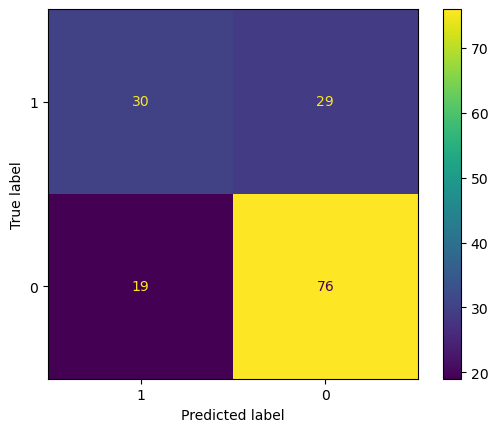

In [ ]:
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=XXX) # Chamar o algoritmo
knn.fit(XXX, XXX) # Aqui estamos a dar os dados de treino (X+y) ao modelo para ele treinar; estamos a fazer o fitting
y_pred = knn.predict(XXX) # Aqui estamos a testar o algoritmo treinado, dando-lhe apenas as variáveis explicativas para ele prever a variável de output sem a ver

cm = confusion_matrix(y_test, y_pred, labels=df['Outcome'].unique()) # Criar a matriz de condusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Outcome'].unique()) # Para poder ver a matriz
disp.plot() # Fazer o gráfico
# O classification report mostra as métricas accuracy, precision e recall. Mostra ainda a f1-score que é uma métrica que utiliza o precision e o recall
print(classification_report(y_test, y_pred))

# **2. Exercício de regressão**

Lê o dataset "housing". O objetivo é prever o preço das casas. Cada função em baixo deve ser completada por vocês para praticarem o pipeline completo de regressão.

Executa os próximos comandos para carregar o ficheiro `housing.csv` a partir do seu computador.

In [ ]:
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [ ]:
df2.dtypes

Preenche as funções seguintes para construir o vosso próprio pipeline de regressão. Segue as notas nos comentários para saber o que fazer em cada uma.

In [ ]:
def process_data(X, num_vars, cat_vars):
  # Copiar função de cima


def split_data(X, y, test_portion):
  # Fazer

def train_model(X_train, X_test, y_train):
  reg = LinearRegression().fit(X_train, y_train) # Fazer o fitting aos dados de treino
  y_pred = reg.predict(X_test)

  return y_pred

def get_error(y_pred, y_true):
  print(f'Erro absoluto médio = {mean_absolute_error(y_true, y_pred)}')

  plt.figure()
  plt.plot(range(0, y_true.shape[0]), y_true, color='blue', label='Valores reais')
  plt.plot(range(0, y_pred.shape[0]), y_pred, color='red', label='Valores previstos', linewidth=0.5)
  plt.grid()
  plt.legend()

Completa o bloco final identificando o nome da feature alvo (preço) e chamando as funções criadas: processa os dados, divide em treino/teste, treina o modelo e calcula o erro e o R2. A leitura do código de exemplo deve servir como guia para a ordem correta das operações.

In [ ]:
target = XXX # Identificar a variável a prever
independent_vars = df2.columns.difference([target]) # Identificar as variáveis explicativas/independentes
X, y = df2[independent_vars], df2[target] # Dividir o target das variáveis explicativas

cat_vars = [XXX] # Identificar as variáveis categóricas
num_vars = df2.columns.difference([target] + cat_vars).tolist() # Identificar as variáveis numéricas, que são todas menos as categóricas e o target
X = process_data(X, num_vars, cat_vars) # Processar os dados, este passo é comum a todos os algoritmos, logo podemos só fazer de uma vez

X_train, X_test, y_train, y_test = split_data(X, y, 0.3) #Dividir o dataset em treino e teste
y_pred = train_model(X_train, X_test, y_train)
get_error(y_pred, y_test)
print(f'R2 = {r2_score(y_test, y_pred)}')